In [66]:
import pandas as pd
import numpy as np
from IPython import display
from matplotlib import image
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import ipywidgets as widgets
%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as pltp
%matplotlib inline


stationlocs = pd.read_csv("BARTLocationPercentages.csv")
print(stationlocs)

    Station_Name  X_Percentage  Y_Percentage  Rain_Critical  \
0    A50_TCR_105        51.968        57.745              1   
1        A10_TCR        41.631        46.257              1   
2        R60_TCR        24.080        13.060              1   
3    R50_TCR_105        26.500        15.830              1   
4        R10_TCR        36.250        26.480              1   
..           ...           ...           ...            ...   
295  E10-TEMPMON        67.665        11.020              0   
296  E39-TEMPMON        80.000        11.000              0   
297   C55-TC-UPS        56.917        11.881              0   
298   E10-TC-UPS        67.665        11.020              0   
299   NOAA_ALERT        11.000         6.000              0   

           Asset_Location  
0                Bay Fair  
1            Lake Merritt  
2                Richmond  
3    El Cerrito Del Norte  
4                   Ashby  
..                    ...  
295    Temperature Sensor  
296    Temperature 

In [67]:
vizpic = display.Image("./BARTtracksmap.png")
picdata = image.imread('./BARTtracksmap.png')
#picdata

In [68]:
x = stationlocs['Station_Name'].tolist()

In [69]:
#x

In [70]:
y = 'M10'

In [71]:
y

'M10'

In [72]:
for i in x:
    if y in i:
        print(i)

M10_TCR
M10-TEMPMON
M10-TC-UPS


In [73]:
testlog = pd.read_csv("testocclog.csv")
print(testlog.columns)
testlog.head(10)

Index(['Time', 'Ref', 'Log', 'BPD', 'Location'], dtype='object')


,Time,Ref,Log,BPD,Location
0,622,NaN,DMZ1 issued Cat B W/O's for MW02 to set on and...,NaN,M60
1,640,622.0,DMZ1 cleared Cat B W/O's for the M1 Track and ...,NaN,M60
2,656,NaN,DMZ1 issued Cat B W/O's for the M55XL to crank...,NaN,M55
3,658,NaN,T950 Inspection train in C80 TM1 dispatching t...,NaN,C80
4,700,NaN,Single Tracking established on the M2 Track be...,NaN,M17
5,703,656.0,DMZ1 cleared Cat B W/O's for the M55XL. Protec...,NaN,M55
6,732,NaN,T918 completed track inspection on the C2 Trac...,NaN,C20
7,735,NaN,"T229 verified A78[A1/A2] cranked, clamped and ...",NaN,A78
8,745,NaN,T918 completed track inspection on the C1 Trac...,NaN,K10
9,753,NaN,"T221 R60-2 No ATO doors, 311.",NaN,R60


In [74]:
testlog = testlog.drop(columns=['BPD', 'Ref'])

In [75]:
print(testlog)

    Time                                                Log Location
0    622  DMZ1 issued Cat B W/O's for MW02 to set on and...      M60
1    640  DMZ1 cleared Cat B W/O's for the M1 Track and ...      M60
2    656  DMZ1 issued Cat B W/O's for the M55XL to crank...      M55
3    658  T950 Inspection train in C80 TM1 dispatching t...      C80
4    700  Single Tracking established on the M2 Track be...      M17
5    703  DMZ1 cleared Cat B W/O's for the M55XL. Protec...      M55
6    732  T918 completed track inspection on the C2 Trac...      C20
7    735  T229 verified A78[A1/A2] cranked, clamped and ...      A78
8    745  T918 completed track inspection on the C1 Trac...      K10
9    753                      T221 R60-2 No ATO doors, 311.      R60
10   753  T507 issued road manual into M40-2 and verifie...      M40
11   753                      T221 R60-2 No ATO doors, 311.      R60
12   753  A/L/S & R Line opened and staffed per SOFO.[Bu...      R10
13   756       C/K Line opened and

In [76]:
stationarr = (stationlocs['Station_Name']).tolist()
sarr = []
for s in stationarr:
    s = s[0:3]
    sarr.append(s)

In [77]:
#sarr

In [78]:
stationlocs['Location'] = sarr

In [79]:
print(stationlocs)

    Station_Name  X_Percentage  Y_Percentage  Rain_Critical  \
0    A50_TCR_105        51.968        57.745              1   
1        A10_TCR        41.631        46.257              1   
2        R60_TCR        24.080        13.060              1   
3    R50_TCR_105        26.500        15.830              1   
4        R10_TCR        36.250        26.480              1   
..           ...           ...           ...            ...   
295  E10-TEMPMON        67.665        11.020              0   
296  E39-TEMPMON        80.000        11.000              0   
297   C55-TC-UPS        56.917        11.881              0   
298   E10-TC-UPS        67.665        11.020              0   
299   NOAA_ALERT        11.000         6.000              0   

           Asset_Location Location  
0                Bay Fair      A50  
1            Lake Merritt      A10  
2                Richmond      R60  
3    El Cerrito Del Norte      R50  
4                   Ashby      R10  
..                   

In [80]:
justxandy = stationlocs.drop(columns=['Station_Name', 'Rain_Critical', 'Asset_Location'])

In [81]:
print(justxandy)

     X_Percentage  Y_Percentage Location
0          51.968        57.745      A50
1          41.631        46.257      A10
2          24.080        13.060      R60
3          26.500        15.830      R50
4          36.250        26.480      R10
..            ...           ...      ...
295        67.665        11.020      E10
296        80.000        11.000      E39
297        56.917        11.881      C55
298        67.665        11.020      E10
299        11.000         6.000      NOA

[300 rows x 3 columns]


In [82]:
merged = testlog.merge(justxandy.set_index('Location'), on='Location')

In [83]:
merged.head(5)

,Time,Log,Location,X_Percentage,Y_Percentage
0,622,DMZ1 issued Cat B W/O's for MW02 to set on and...,M60,18.199,58.303
1,622,DMZ1 issued Cat B W/O's for MW02 to set on and...,M60,18.199,58.303
2,622,DMZ1 issued Cat B W/O's for MW02 to set on and...,M60,18.199,58.303
3,640,DMZ1 cleared Cat B W/O's for the M1 Track and ...,M60,18.199,58.303
4,640,DMZ1 cleared Cat B W/O's for the M1 Track and ...,M60,18.199,58.303


In [84]:
merged['dupped'] = merged.duplicated(subset=['Log'])
merged = merged[merged.dupped != True]

In [85]:
merged

,Time,Log,Location,X_Percentage,Y_Percentage,dupped
0,622,DMZ1 issued Cat B W/O's for MW02 to set on and...,M60,18.199,58.303,False
3,640,DMZ1 cleared Cat B W/O's for the M1 Track and ...,M60,18.199,58.303,False
6,658,T950 Inspection train in C80 TM1 dispatching t...,C80,66.134,11.020,False
9,732,T918 completed track inspection on the C2 Trac...,C20,44.152,23.910,False
12,745,T918 completed track inspection on the C1 Trac...,K10,38.815,38.337,False
17,753,"T221 R60-2 No ATO doors, 311.",R60,24.080,13.060,False
23,753,T507 issued road manual into M40-2 and verifie...,M40,20.000,50.460,False
26,753,A/L/S & R Line opened and staffed per SOFO.[Bu...,R10,36.250,26.480,False
29,811,"T221 R10-2 No ATO doors, 311.",R10,36.250,26.480,False
32,756,C/K Line opened and staffed per SOFO.[Bucio],C10,41.697,26.541,False


In [95]:
vizdata = merged.drop(columns=['dupped'])

In [96]:
from tensorflow import keras
model = keras.models.load_model('occ-log-classification/model')

In [97]:
class_legend = MLB_team = {
    0:"Misc",
    1:'Other BPD',
    2:'Homeless',
    3:'Medical',
    4:'Patron interference',
    5:"Vehicle failure",
    6:"Wayside equipment",
    7:"Software related failures",
    8:"Human Error",
    9:"Weather",
    10:"Info (no error)",
    11:"Delays",
    12:"Track obstruction",
    13:"Schedule maintenance"
}

In [98]:
vizdata['Class'] = vizdata['Log'].apply(lambda log: np.argmax(model.predict([log]), axis=1)[0])

In [99]:
vizdata['Class'] = vizdata['Class'].apply(lambda code: class_legend[code])

In [100]:
vizdata

,Time,Log,Location,X_Percentage,Y_Percentage,Class
0,622,DMZ1 issued Cat B W/O's for MW02 to set on and...,M60,18.199,58.303,Track obstruction
3,640,DMZ1 cleared Cat B W/O's for the M1 Track and ...,M60,18.199,58.303,Medical
6,658,T950 Inspection train in C80 TM1 dispatching t...,C80,66.134,11.020,Human Error
9,732,T918 completed track inspection on the C2 Trac...,C20,44.152,23.910,Schedule maintenance
12,745,T918 completed track inspection on the C1 Trac...,K10,38.815,38.337,Schedule maintenance
17,753,"T221 R60-2 No ATO doors, 311.",R60,24.080,13.060,Vehicle failure
23,753,T507 issued road manual into M40-2 and verifie...,M40,20.000,50.460,Software related failures
26,753,A/L/S & R Line opened and staffed per SOFO.[Bu...,R10,36.250,26.480,Info (no error)
29,811,"T221 R10-2 No ATO doors, 311.",R10,36.250,26.480,Vehicle failure
32,756,C/K Line opened and staffed per SOFO.[Bucio],C10,41.697,26.541,Info (no error)


interactive(children=(IntSlider(value=622, description='time', max=1200, min=500), Output()), _dom_classes=('w…

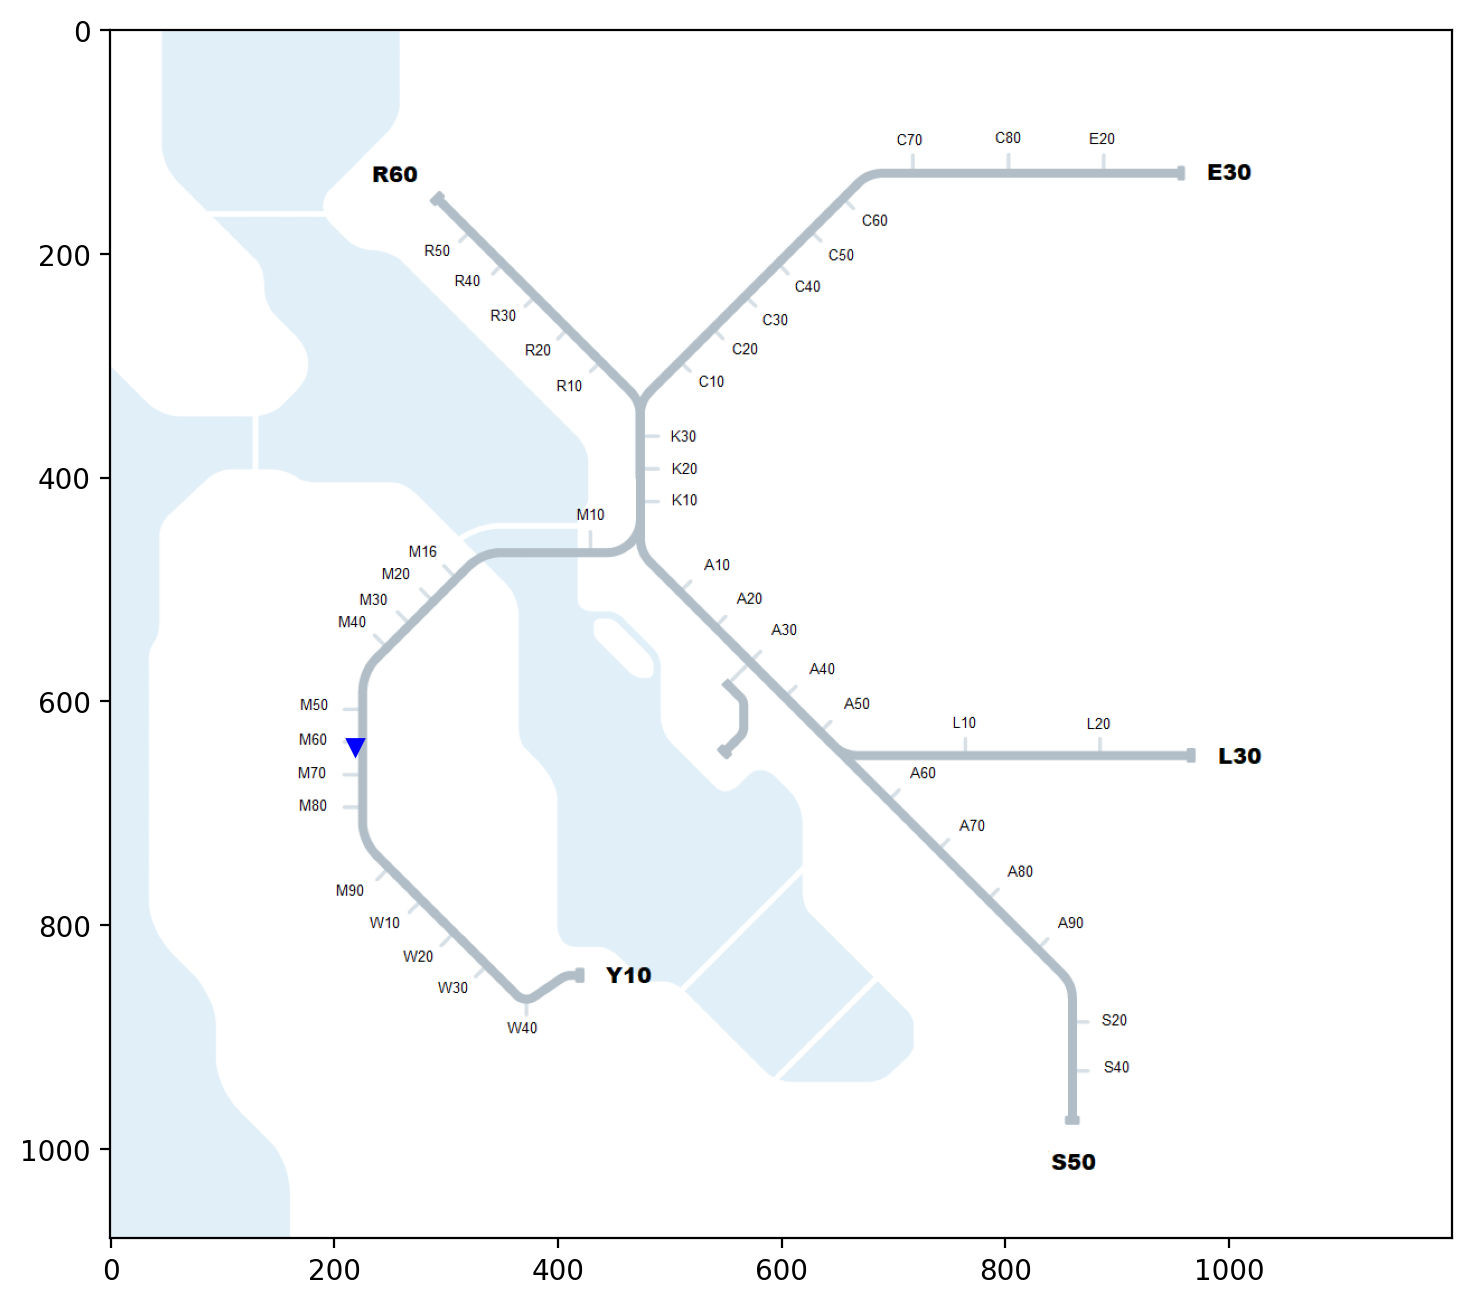

In [53]:
#vizpic


# fig = plt.figure(figsize=(8, 6), dpi=900) uncomment
# plt.imshow(picdata) uncomment



# size = fig.get_size_inches()*fig.dpi uncomment


# size in pixel
#plt.plot(1200* .18199, 1100 * .58303, marker='v', color="blue")
# print(size)
# print(size[0]* .18199)

#first get one dot superimposed based on percentages
#get all the dots on the picture
#make time attribute figure out time scroll (maybe ipywidgets)

#uncomment
# for index,row in vizdata.iterrows():
#     plt.plot(1200* (row['X_Percentage']/100), 1100 * (row['Y_Percentage']/100), marker='v', color="blue")



# plt.show()   uncomment

#x = np.linspace(0, 2 * np.pi)
# fig = plt.figure(figsize=(8, 6), dpi=150)
# plt.imshow(picdata)
# for index,row in vizdata.iterrows():
#     plt.plot(1200* (row['X_Percentage']/100), 1100 * (row['Y_Percentage']/100), marker='v', color="blue")


def update(time = 622):
    #line.set_ydata(np.sin(w * x))
#     def addPoint(scat, new_point):
#         old_off = scat.get_offsets()
#         new_off = np.concatenate([old_off,np.array(new_point, ndmin=2)])
        

#         scat.set_offsets(new_off)
        

#         scat.axes.figure.canvas.draw_idle()
    fig = plt.figure(figsize=(10, 8), dpi=200)
    plt.imshow(picdata)
    for index,row in vizdata.iterrows():
        if row['Time'] <= time:
            plt.plot(1200* (row['X_Percentage']/100), 1100 * (row['Y_Percentage']/100), marker='v', color="blue")
            #addPoint(fig, [1200* (row['X_Percentage']/100),1100 * (row['Y_Percentage']/100)])
    #############
#     norm = plt.Normalize(1,4)
#     cmap = plt.cm.RdYlGn
#     fi, ax = plt.subplots()
#     annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
#                     bbox=dict(boxstyle="round", fc="w"),
#                     arrowprops=dict(arrowstyle="->"))
#     annot.set_visible(False)
    
    

#     def update_annot(ind):

#         pos = fig.get_offsets()[ind["ind"][0]]
#         annot.xy = pos
#         text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
#                                " ".join([names[n] for n in ind["ind"]]))
#         annot.set_text(text)
#         annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
#         annot.get_bbox_patch().set_alpha(0.4)


#     def hover(event):
#         vis = annot.get_visible()
#         if event.inaxes == ax:
#             cont, ind = fig.contains(event)
#             if cont:
#                 update_annot(ind)
#                 annot.set_visible(True)
#                 fi.canvas.draw_idle()
#             else:
#                 if vis:
#                     annot.set_visible(False)
#                     fi.canvas.draw_idle()

#     fi.canvas.mpl_connect("motion_notify_event", hover)
    ############
    fig.canvas.draw_idle()
    #plt.show()

#interact(update);
interact(update, time = widgets.IntSlider(value=622, min=500, max=1200, step=1));

In [ ]:
catvizdata = vizdata.drop(columns=['X_Percentage', 'Y_Percentage'])
cattypes = ['Police Activity',
'Unhoused',
'medical emergencies',
'patron interference',
'vehicle failures',
'wayside equipment',
'miscellaneous',
'software related failures',
'human error',
'weather']
categories = []
for i in catvizdata['Location']:
    categories = np.append(categories, np.random.choice(cattypes))
catvizdata['Category'] = categories
refs = []
refs = np.random.choice(np.arange(len(catvizdata['Location'])), len(catvizdata['Location']), replace=False)

catvizdata['Reference'] = refs
catvizdata

In [ ]:
import datetime
timarr = []
for t in catvizdata['Time']:
    temp = datetime.time(t//100, t%100)
    timarr.append(temp)
catvizdata['Time'] = timarr

In [ ]:
from datetime import time
timeaxis = []
start = datetime.time(5, 0, 0)
end = datetime.time(22, 0, 0)
currhr = 5
currmin = 1
timeaxis.append(start)
for i in range(1020):
    nexttime = datetime.time(currhr, currmin, 0)
    timeaxis.append(nexttime)
    if currmin == 59:
        currmin = 0
        currhr = currhr + 1
    else:
        currmin = currmin + 1
catvizdata = catvizdata.sort_values(by=['Time'])
xaxistime = catvizdata['Time']

In [ ]:
import plotly.express as px
swimscatter = px.scatter(catvizdata, y="Category", x='Time', color="Category", symbol="Category", hover_data=['Log', 'Location'])
swimscatter.update_traces(marker_size=20)
swimscatter.update_xaxes(categoryorder='category ascending', showgrid=False)
swimscatter.show()

In [ ]:
swimscatter.write_html(r"C:\Users\Hannah Abraham\Desktop\BARTvisualizations\bart-daily-ops\src\swimscatter.html")

In [ ]:

import plotly.graph_objects as go

swim = go.Figure(go.Waterfall(
    name = "DailyOps", orientation = "h",
    y = catvizdata['Category'],
    x = timeaxis,
    connector = {"mode":"between", "line":{"width":0, "color":"rgb(0, 0, 0)", "dash":"solid"}}
))

swim.update_layout(title = "BART Daily Operations By Category")

swim.show()

In [ ]:
cattonum = []
for i in catvizdata['Category']:
    cattonum = np.append(cattonum, cattypes.index(i)+1)
#     if i=='Breakdown':
#         cattonum = np.append(cattonum, 2)
#     if i=='Detour':
#         cattonum = np.append(cattonum, 3)
#     if i=='Misc':
#         cattonum = np.append(cattonum, 4)
cattonum

In [ ]:
# pltp.barh("Category", "Time", data = catvizdata, color = "blue")
# pltp.xlabel("Time")
# pltp.ylabel("Category")
# pltp.title("Incidents by Category")
# pltp.show()


# plt.xlim(0, 900)
# #plt.ylim(1, 4)
# plt.yticks(cattypes)
# plt.plot(800,2,'r+') 
# plt.show()

# Data set
height = range(0,900)
bars = cattypes
y_pos = np.arange(len(bars))

# Basic plot
plt.bar(height, y_pos, color=(0.2, 0.4, 0.6, 0.6))
 
# Custom ticks
plt.tick_params(axis='x', colors='red', direction='out', length=13, width=3)

#Show the graph
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

years = str(catvizdata['Time'])

fig = go.FigureWidget()
#f = go.FigureWidget(fig)
refnums = catvizdata['Reference']


fig.add_trace(go.Bar(x=years, y=([0.5] * catvizdata.shape[0]),
                base=cattonum,
                marker_color='blue',
                name='incidents'))
fig.update_yaxes(nticks=8)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightBlue')
fig.update_xaxes(tickwidth=2)
fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        ticktext = cattypes
    )
)
for data in fig.data:
    data["width"] = 3 #Change this value for bar widths
    
out = Output()
@out.capture(clear_output=True)
# create our callback function
def showdetails(trace, points, selector):
    for i in points.point_inds:
        print(points.point_inds)
        print(points)
        print(trace)
        print(selector)
        

l = fig.data[0]
l.on_click(showdetails)

#fig.show()
VBox([fig, out])

In [ ]:
long = px.bar(catvizdata, x="Time", y="Category", color="Category", title="Long-Form Input")
long.show()